# California Housing Prices

When you are learning about machine learning, it is best to experiment with real-world data and problem sets and not only artificial datasets. There are a lot of websites that offer interesting open datasets, ranging across all sorts of domains, here are a few places you can look to get data:

* [UC Irvine ML Repo](http://archive.ics.uci.edu/ml/index.php)
* [Kaggle datasets collection](https://www.kaggle.com/datasets)
* [Amazon's AWS datasets](https://registry.opendata.aws)
* [Open Data Monitor](https://opendatamonitor.eu)
* [Nasdaq Data Link](https://data.nasdaq.com)
* [Datahub](https://datahub.io/collections)
* [FiveThirtyEight](https://data.fivethirtyeight.com)
* [World Bank Open Data](https://data.worldbank.org)

In this case study we'll use the California Housing Prices dataset. This dataset is based on data from the 1990 California census. It is not recent, but it has many qualities for learning. 
In this first case study, every step is explained and discussed thoroughly, most of the theory and explanations are from [1] and [2].

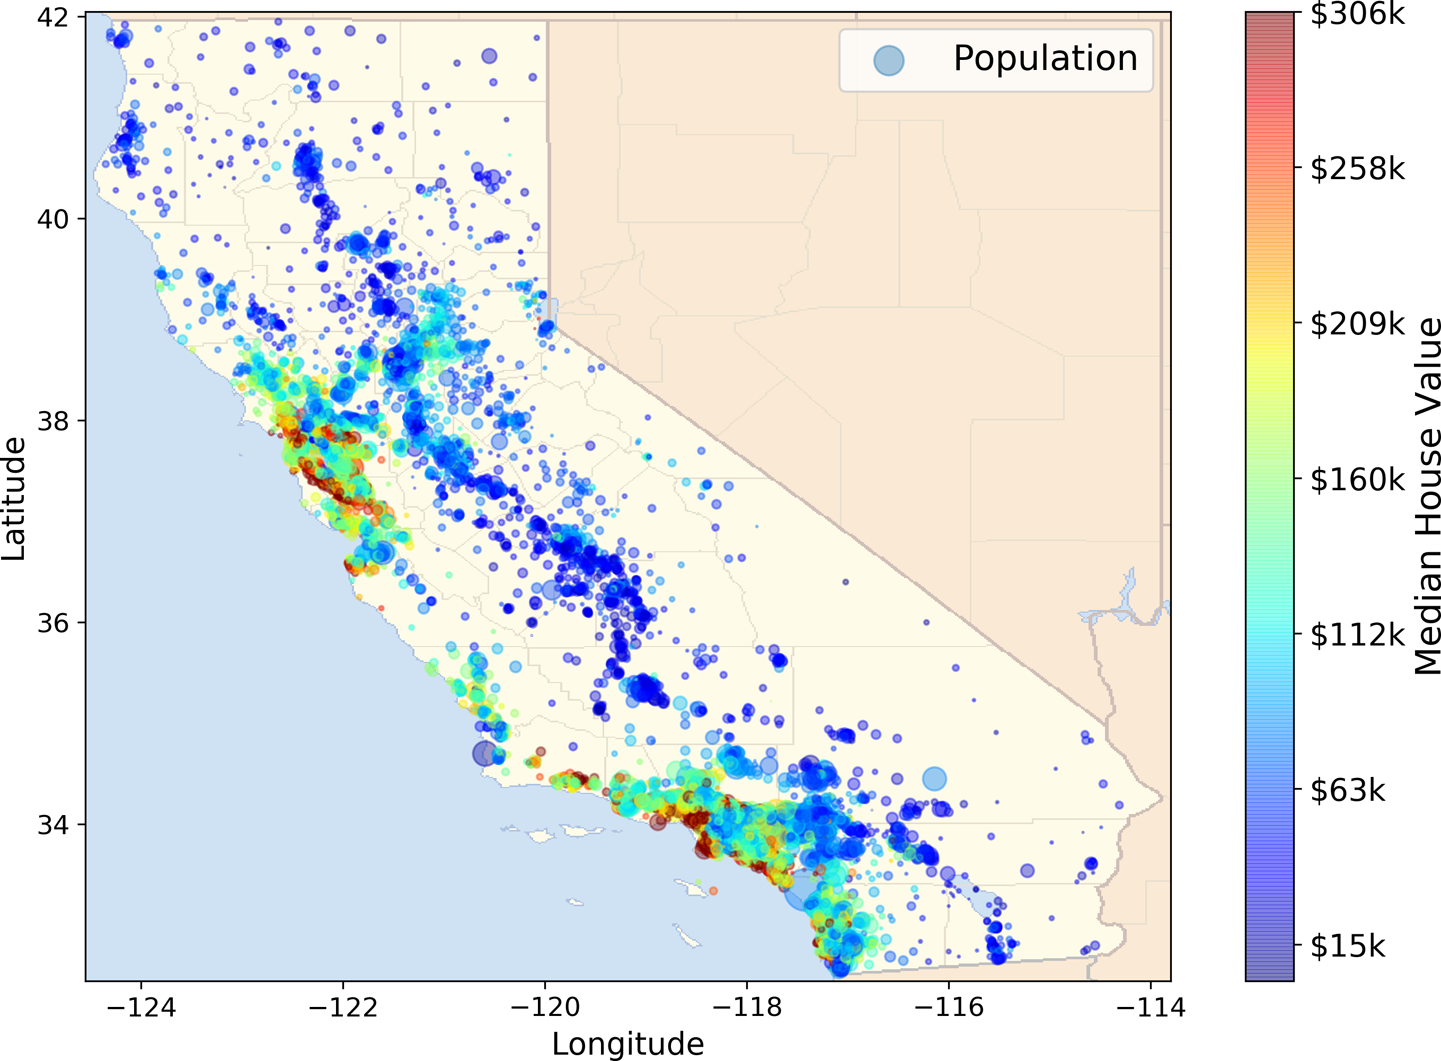



As a well-trained data scientist, the first thing to do is pull out your machine learning project checklist. This checklist should guide you through your ML projects and consists of 8 main steps:

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

In practice, you can adjust this list at will to meet your specific needs.

## Look at the Big Picture

The first question to ask your client, when framing the problem, is what exactly the business objective is. Indeed, the objective will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it. 

The next question to ask is what the current solution looks like (if any). The current situation will often give you a reference for performance, as well as insights on how to solve the problem.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
# set notebook environment
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv("data/housing.csv")
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7433,-118.21,33.94,40.00,"2,227.00",594.00,"2,244.00",580.00,2.45,"143,800.00",<1H OCEAN
7212,-118.18,34.03,44.00,"1,629.00",420.00,"1,893.00",387.00,2.30,"137,500.00",<1H OCEAN
2758,-115.49,32.67,29.00,"1,523.00",440.00,"1,302.00",393.00,1.13,"84,700.00",INLAND
5852,-118.32,34.17,39.00,"1,995.00",564.00,"1,202.00",544.00,3.59,"250,000.00",<1H OCEAN
5685,-118.23,34.24,31.00,"3,857.00",607.00,"1,695.00",572.00,7.64,"396,400.00",<1H OCEAN


## Explore and Clean the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All attributes are numerical, except the ocean_proximity field. Its type is object, which in this case means categories as strings.

In [5]:
# let's check the summary statistics of objects columns:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,433.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,-119.57,35.63,28.64,"2,635.76",537.87,"1,425.48",499.54,3.87,"206,855.82"
std,2.00,2.14,12.59,"2,181.62",421.39,"1,132.46",382.33,1.90,"115,395.62"
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,"14,999.00"
25%,-121.80,33.93,18.00,"1,447.75",296.00,787.00,280.00,2.56,"119,600.00"
50%,-118.49,34.26,29.00,"2,127.00",435.00,"1,166.00",409.00,3.53,"179,700.00"
75%,-118.01,37.71,37.00,"3,148.00",647.00,"1,725.00",605.00,4.74,"264,725.00"
max,-114.31,41.95,52.00,"39,320.00","6,445.00","35,682.00","6,082.00",15.00,"500,001.00"


Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute using the hist() function integrated in pandas:

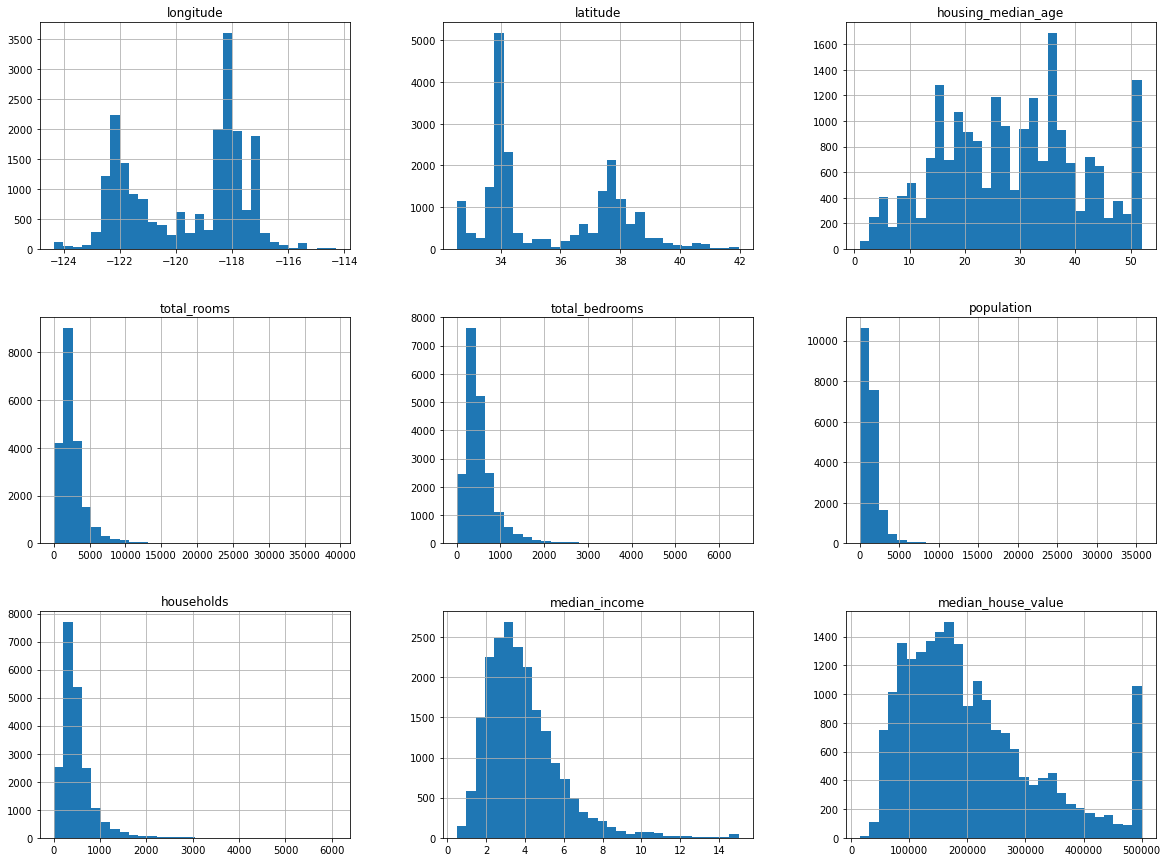

In [7]:
df.hist(bins=30, figsize=(20, 15));

At this point we try to identify inconsistencies or strange behavior in our data or other quality related problems that need to be clarified with the client. 

There are few things you might notice in these histograms:

1. The median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars. Working with preprocessed attributes is common in machine learning, and it is not necessarily a problem, but should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The later may be a serious problem since it is your target attribute. Your machine learning algorithms may learn that prices never go beyond that limit.

3. These attributes have very different scales.

4. Finally, many histograms are *tail-heavy*: They extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

<div class="alert alert-block alert-warning">
<b>Warning:</b> <br>
    Before you look at the data any further, you need to created a test set, put it aside, and never look at it.
</div>

## Create a Test Set

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=.2, random_state=42)

While splitting the data into train and test, there are more chance for the dataset to have different distributions especially in case of small dataset. The proportions of the classes on train and test dataset can differ.  
This means we are training on one dataset and evaluating with the other. This will invite error in the prediction. This is where stratified sampling is the point to note. The stratified sampling forces the distribution of the data in train and test to be same. This will give better prediction on small data sets.

Let's look at the median income histogram from above more closely: most median income values are clustered around 1.5 to 6 (in \\$10,000), bur some median incomes go far beyond 6. <code style="background:yellow;color:black">It is important to have a sufficient number of instances for each stratum, or else the estimate of a stratum's importance may be biased.</code> This means that you should not have too many strata, and each stratum should be large enough. 

The following code uses the `pd.cut()` function to create an income category attribute with 5 categories:

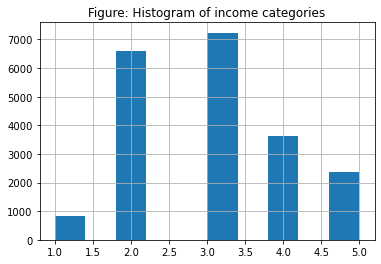

In [9]:
df['income_cat'] = pd.cut(df['median_income'],
                         bins=[0, 1.5, 3, 4.5, 6, np.inf],
                         labels=[1, 2, 3, 4, 5])

df['income_cat'].hist()
plt.title('Figure: Histogram of income categories');

Now we are ready to do stratified sampling based on the income category. For this we can use the `StratifiedShuffleSplit` class from scikit-learn.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Let's see if this worked as expected. You can start by looking at the income category proportions in the test set:

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3   0.35
2   0.32
4   0.18
5   0.11
1   0.04
Name: income_cat, dtype: float64

In [13]:
df["income_cat"].value_counts() / len(df)

3   0.35
2   0.32
4   0.18
5   0.11
1   0.04
Name: income_cat, dtype: float64

As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset.

Now you should remove the income_cat attribute so the data is back to its original state:

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of a Machine Learning project.

## Discover and Visualize the Data to Gain Insights

Before diving deeper into the data set exploration, we are using only the training set. Also, if the training set is very large, we may want to sample an exploration set, to make manipulations easy and fast. In our case, the dataset is quite small, so we can just work directly on the training set.

In [15]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data:

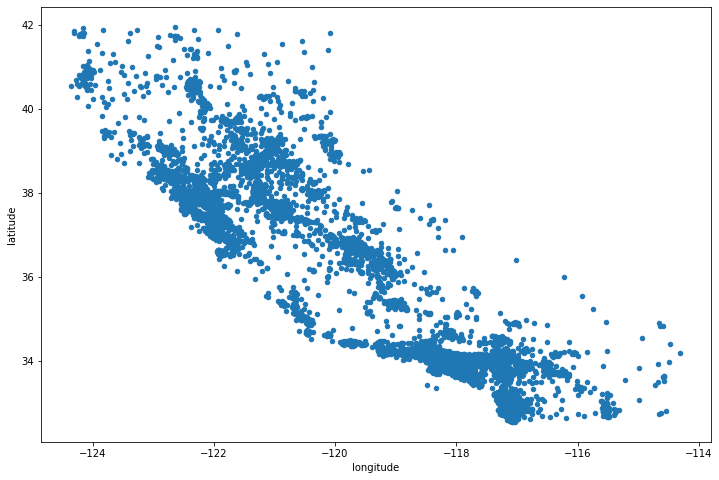

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(12, 8));

This looks a bit like California, but other than that it is hard to see any particular pattern. We can add more information to a scatter plot by changing the colors and size of the dots depending on some features.  
So let's do that with our plot, where the size of the dots will represent the district's population and the color the price range of the houses.

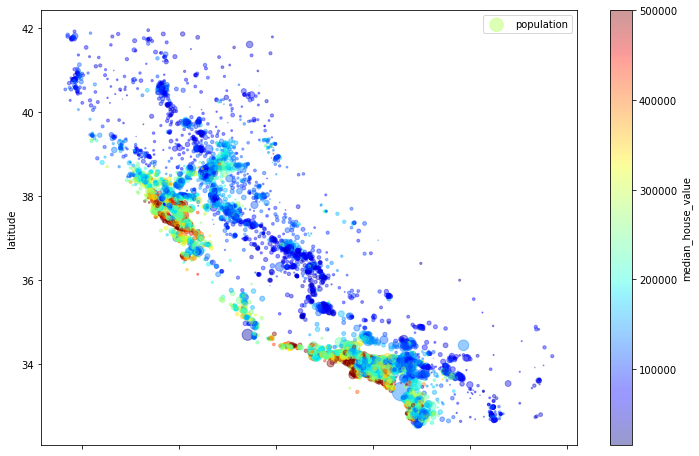

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(12,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend();

We can go further and add a map of California as a background to the above picture.

In [18]:
import matplotlib.image as mpimg

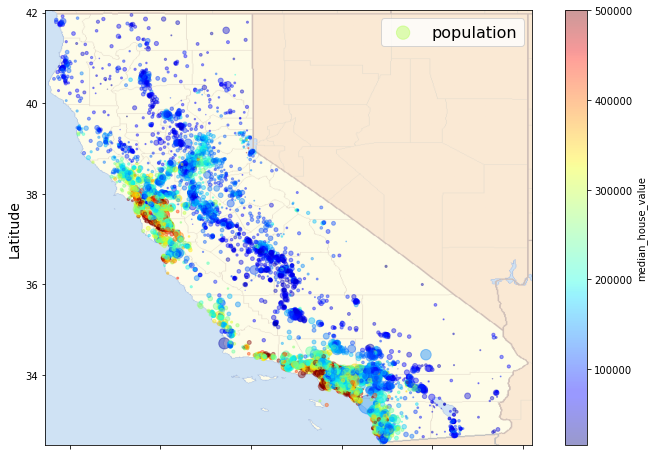

In [19]:
cali = mpimg.imread('img/california.png')

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing["population"]/100, label="population", figsize=(12,8),
                  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
                 )

plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16);

This image tells you that the housing prices are very much related to the location and to the population density. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although not every where, so it is not a simple rule.

### Looking for Correlations

In [20]:
corr_matrix = housing.corr()

Let's first look at how much each attribute correlates with the median house value:

In [21]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.00
median_income         0.69
total_rooms           0.14
housing_median_age    0.11
households            0.06
total_bedrooms        0.05
population           -0.03
longitude            -0.05
latitude             -0.14
Name: median_house_value, dtype: float64

Now, let's display other interesting correlations

<AxesSubplot:>

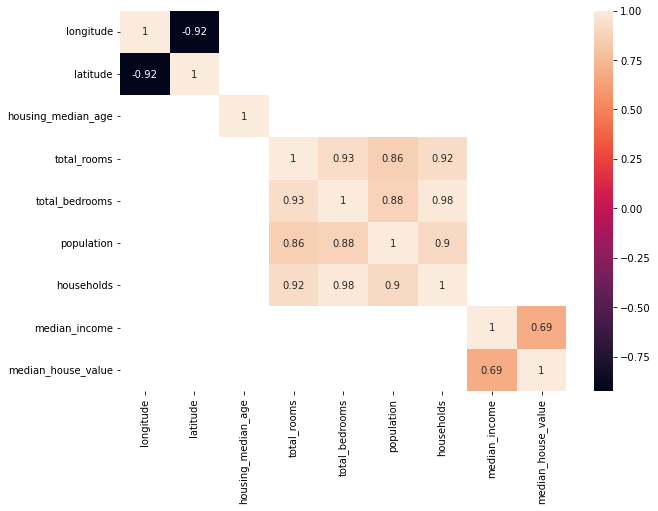

In [22]:
plt.figure(figsize= (10,7))
sns.heatmap(corr_matrix[np.abs(corr_matrix)>.65], annot=True, )

Another way to check for correlation between attributes is to use the `pairplot()` function of seaborn:

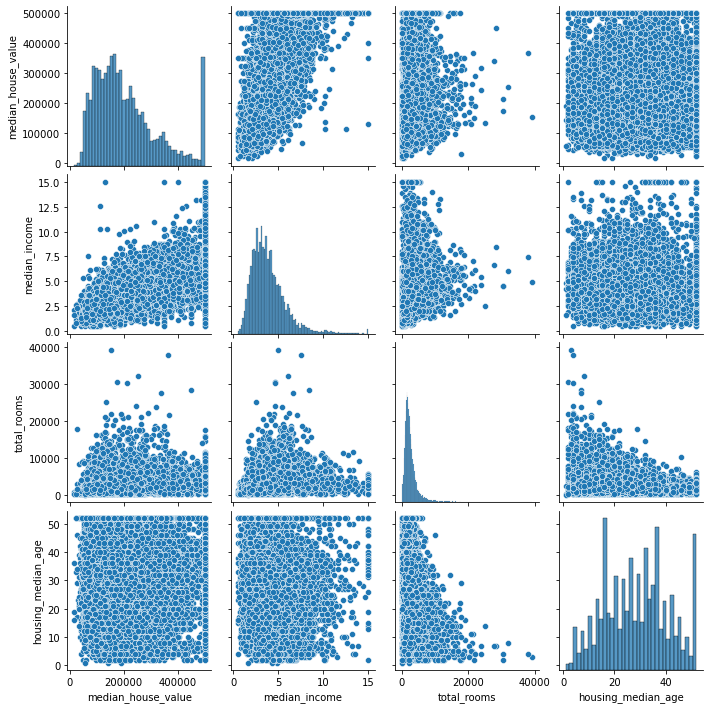

In [23]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
sns.pairplot(housing[attributes]);

So the most promising attribute to predict the median house value is the median income, so let's zoom in their correlation scatterplot

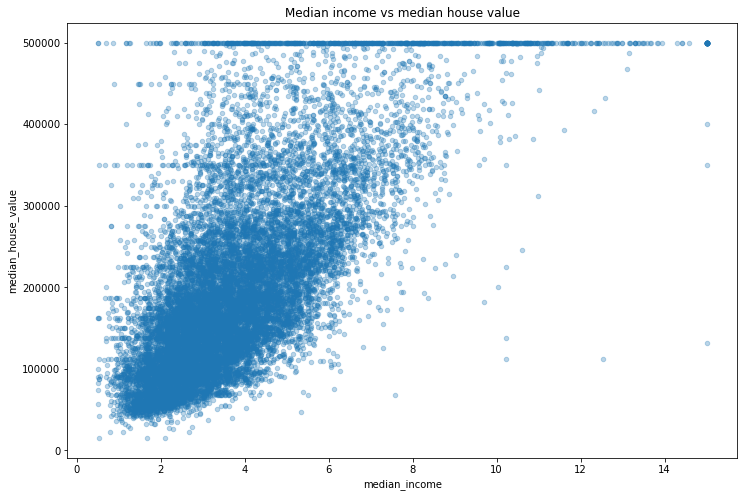

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.3, figsize=(12, 8))
plt.title('Median income vs median house value');

This plot reveals a few things:

1. The correlation is indeed very strong, we can clearly see the upward trend, and the point are not too dispersed.
2. The price cap that we noticed earlier is clearly visible as a horizontal line at \\$50,000
3. This plot reveals other less obvious straight lines: a horizontal line around \\$450,000 and another around \\$350,000. Perhaps one around \\$280,000, and a few below that. You may want to try removing the corresponding districts to  prevent your algo from learning to reproduce these quirks.

### Experimenting with Attribute Combinations

Hopefully the previous sections gave you an idea of a few ways you can explore the data and gain insights. We identified a few data quirks that we may want to clean up before feeding the data to a ml algorithm. We also found interesting correlations between attributes, in particular with the target attribute. We also noticed that some attributes have a tail-heavy distribution, so we may want to transform them (e.g. by computing their logarithm). Of course, the mileage will vary considerably with each project, but the general ideas are similar.

One last thing we may want to do before preparing the data for ml is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful i we don't know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes:


In [25]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.00
median_income               0.69
rooms_per_household         0.15
total_rooms                 0.14
housing_median_age          0.11
households                  0.06
total_bedrooms              0.05
population_per_household   -0.02
population                 -0.03
longitude                  -0.05
latitude                   -0.14
bedrooms_per_room          -0.26
Name: median_house_value, dtype: float64

The new `bedrooms_per_room` attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive... Interesting!

<div class="alert alert-block alert-info">
<b>Tip:</b> <br>
 This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.</div>

## Prepare the data for ml algorithms

It’s time to prepare the data for your Machine Learning algorithms. Instead of doing this manually, you should write functions for this purpose.

In [27]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them. We saw earlier that the total_bedrooms attribute has some missing values, so let's fix this. You have three options:

1. Get rid of the corresponding districts.
2. Get rid of the whole attribute
3. Set the missing values to some value (zero, mean, median, etc.)

We can accomplish these easily using DataFrame's `dropna()`, `drop()`, and `fillna()` methods:

In [28]:
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`. Here is how to use it. First, you need to create a `SimpleImputer` instance, specifying that you want to replace each attribute's missing values with the median of that attribute:

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity:

In [31]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now we can fit the imputer instance to the training data using the `fit()` method:

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The `imputer` has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. Only the `total_bedrooms` attribute has missing values, but we cannot be sure that there won't be any missing values in new data after the system goes live, so it is safer to apply the `imputer` to all the numerical attributes:

In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now we can use the trained `imputer` to transform the training set by replacing missing values with the learned medians:

In [35]:
X = imputer.transform(housing_num)

The result is a plain NumPy array containing the transformed features. It is better to put it back into a pandas DataFrame:

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## Handling Text and Categorical Attributes

So far we have only dealt with numerical attributes, but now let's look at text attributes. In this dataset, there is just one: the `ocean_proximity` attribute. Let's look at its value for the first 10 instances:

In [37]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Most machine learning algorithms prefer to work with numbers. There are two possibilities to transform categorical data to numerical, both are from the `sklearn.preprocessing` module:
1. `OrdinalEncoder` and
2. `OneHotEncoder`.

`OrdinalEncoder` is for ordered categories such as "bad", "average", "good" and "excellent", and it is obviously not the case for the `ocean_proximity` column. So in this case we are going to use `OneHotEncoder` alogorithm, which transforms every category to a binary attribute: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on.

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [40]:
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

Notice that the output is a Scipy compressed sparse matrix, instead of a NumPy array.  
This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array,21 but if you really want to convert it to a (dense) NumPy array, just call the `toarray()` method:

In [41]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

You can get the list of categories using the encoder's `categories_` instance variable:

In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

Although Scikit-learn provides many useful transformers, we will sometimes need to write our own for tasks such as custom cleanup operations or combining specific attributes. It is important that our transformer works seamlessly with Scikit-learn functionalities (such as pipelines), and since Scikit-learn relies on duck typing (not inheritance), all you need to do is create a class and implement three methods: `fit()`, `transform()`, `fit_transorm`.

You can get the last one by simply adding `TransformerMixin` as a base class. If you add `BaseEstimator` as a base class (and avoid `*args` and `**kargs` in your constructor), you will also get two extra methods: `get_params()` and `set_params()` that will be useful for automatic hyperparameter tuning.

For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [45]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales.  
This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. <code style="background:yellow;color:black">Note that scaling the target values is generally not required</code>.

There are two common ways to get all attributes to have the same scale: *min-max scaling* and *standardization*.  
Scikit-learn provides a transformer called `MinMaxScaler` for min-max scaling. It has a `feature_range` hyperparameter that let's you change the range if, for some reason you don't want 0-1, and a transformer called `StandardScaler` for standardization.

<div class="alert alert-block alert-warning">
<b>Warning:</b><br>
    As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
</div>

## Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-learn provides the `Pipeline` class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The `Pipeline` constructor takes a list of `(name, estimator)` pairs defining a sequence of steps. All but the last estimator must be transformers (i.e. they must have a `fit_transform()` method). The names can be anything you like (as long as they are unique and don't contain double underscores, \_\_); they will come in handy later for hyperparameter tuning.  

When you call the pipeline's `fit()` method, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the `fit()` method.

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.  The `ColumnTransformer` class is exactly for this purpose conceived and it works  great with pandas DataFrame. Let's use it to apply the transformations to the housing data:

In [48]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

First we import the `ColumnTransformer` class, next we get the list of numerical column names and the list of categorical column names, and then we construct a `ColumnTransformer`.  
The constructor requires a list of tuples, where each tuple contains a name, a transformer, and a list of names (or indices) of columns that the transformer should be applied to.  
Finally, we apply this `ColumnTransformer` to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

In [49]:
housing_prepared = full_pipeline.fit_transform(housing)

Instead of using a transformer, you can specify the string "drop" if you want the columns to be dropped, or you can specify "passthrough" if you want the columns to be left untouched. By default, the remaining columns (i.e. the ones that were not listed) will be dropped, but you can set the remainder hyperparameter to any transformer (or to "passthrough") if you want these columns to be handled differently.

## Select and Train a Model

We framed the problem, got the data and explored it, we sampled a training set and a test set, and we wrote transformation pipelines to clean up and prepare our data for machine learning algorithms automatically. Now we are ready to select and train a model.

### Training and Evaluating on the Training Set

Let's first train a Linear Regression model.

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Done! We now have a Linear Regression model. Let's try it out on few instances from training set:

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [53]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [54]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). Let's measure this regression model's RMSE on the whole training set using Scikit-Learn's mean_squared_error() function:

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

This is better than nothing, but clearly not a great score: most districts' median_housing_values range between \\$120,000 and \\$265,000, so a typical prediction error of \\$68,628 is not very satisfying. 
This is an example of a model underfitting the training data. When it happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model. This model is not regularized, which rules out the last option. We could try to add more features, but first let's try a more complex model to see how it does.

Let's try a `DecisionTreeRegressor`. This is a powerful model, capable of finding complex nonlinear relationships in the data:

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

Now that the model is trained, let's evaluate it on the training set:

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It looks like we overfitted the data. How can we be sure? We might also have found the perfect model! As we saw earlier, we don't want to touch the test set until we are ready to launch a model we are confident about. So we need to use part of the training set for training and part of it for model validation.

### Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the `train_test_split()` function to split the training set into a smaller training set and validation set, then train our models against the smaller training set and evaluate them against the validation set. It's a bit of work, but nothing too difficult.

A great alternative, however, is to use Scikit-Learn's *K-fold cross-validation* feature. The following code randomly splits the training data into 10 distinct subsets called *folds*, the it trains and evaluates the Decision Tree model 10 times, picking different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

<div class="alert alert-block alert-warning">
<b>Warning:</b> Scikit-Learn's cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.
</div>

In [62]:
# Let's look at the results:
def display_scores(scores):     
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [63]:
display_scores(tree_rmse_scores)

Scores: [68814.09643876 66801.271886   71569.56408538 69694.75882585
 70074.58645635 74717.91701296 70082.92089814 70396.75797948
 76239.17342355 71235.16540295]
Mean: 70962.62124094319
Standard deviation: 2604.036314900812


Now the Decision Tree doesn't look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation).

Let's compute the same score for the Linear Regression model just to be sure:

In [64]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798342


That's right: the Decision Tree model is overfitting so badly that it performs worse that the Linear Regression model.

Let's try one last model now: the `RandomForestRegressor`. It works by training many Decision Trees on random subsets of the features, then averaging out their predictions. <code style="background:yellow;color:black">Building a model on top of many other models is called <em>Ensemble Learning</em></code> and it's often a great way to push ML algorithms even further.

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [67]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49848.0867499  47135.93952679 49779.92956609 52329.7043522
 49663.96355807 53223.08636037 49045.37745329 47666.80476618
 53138.6485742  50158.31441331]
Mean: 50198.985532040046
Standard deviation: 2000.9600116688187


This is much better: Random Forests look very promising. Let's evaluate it on the training set:

In [68]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18590.668294500327

The score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are simplify the model, constrain it (i.e. regularize it), or get a lot more training data.  
Before we dive much deeper into Random Forests, however, we syould try out many other models from various categories of ml algorithms (e.g. several support vector machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (2 to 5) promising models.

<div class="alert alert-block alert-info">
<b>Tip:</b><br>
    We should save every model we experiment with so that we can come back easily to any model we want. We have to make sure to save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow us to easily compare scores across model types, and compare the types of errors they make.</div>
    
We can easily save Scikit-Learn models by using Python's `pickle` module or by using the `joblib` library, which is more efficient at serializing large NumPy arrays:

```python
import joblib

joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")
```

## Fine-Tune Our Model
Let's assume, we now have a shortlist of promising models. We now need to fine-tune them. Let's loo at a few ways we can do that

### Grid Search

One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, we should get Scikit-Learn's `GridSearchCV` to search for us. All we need to do is tell it which hyperparameters and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

For example, the following code searches for the best combi of hyperparam. values for the `RandomForestRegreeor`:

In [69]:
from sklearn. model_selection import GridSearchCV

In [70]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This `param_grid` tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of `n_estimators` and `max_features` hyperparameter values specified in the first dict, then try all 2 x 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True.

The grid search will explore 12 + 6 = 18 combinations of `RandomForestRegressor` hyperparameter values, and it will train each model 5 times.  
 In other words, all in all, there will be 18 × 5 = 90 rounds of training!

In [71]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

We can also get the best estimator directly:

In [73]:
grid_search.best_estimator_
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(max_features=6, n_estimators=30)

<div class="alert alert-block alert-info">
    <b>Note:</b> If <em>GridSearchCV</em> is initialized with <em>refit=True</em> (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea, since feeding it more data will likely improve its performance.</div>
    
And of course the evaluation scores are also available:

In [74]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


64499.56275484651 {'max_features': 2, 'n_estimators': 3}
55901.497280703596 {'max_features': 2, 'n_estimators': 10}
52567.908381228204 {'max_features': 2, 'n_estimators': 30}
60487.20782551803 {'max_features': 4, 'n_estimators': 3}
52836.364463381324 {'max_features': 4, 'n_estimators': 10}
50708.31736445427 {'max_features': 4, 'n_estimators': 30}
58761.5082926256 {'max_features': 6, 'n_estimators': 3}
52139.04439032061 {'max_features': 6, 'n_estimators': 10}
49911.40983779628 {'max_features': 6, 'n_estimators': 30}
58884.55824881789 {'max_features': 8, 'n_estimators': 3}
52018.60954028362 {'max_features': 8, 'n_estimators': 10}
50157.379158989046 {'max_features': 8, 'n_estimators': 30}
61370.20845410999 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54196.26918448853 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60741.82312837126 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53254.423774120674 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In this example, we obtain the best solution by setting the max_features hyperparameter to 6 and the n_estimators hyperparameter to 30. The RMSE score for this combination is 49,911, which is slightly better than the score we got earlier using the default hyperparameter values (which was 50,182). Congratulations, you have successfully fine-tuned your best model!